# Project - EDA with Pandas Using the Boston Housing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv('train.csv')

In [3]:
print(df.shape)
print(df.info(),'\n\n',df.describe())

(333, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
None 

                ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


## comments:
all values are non-null. That is great.
333 rows. 
Each row is a town according to the description
15 columns. 

Let's do some visualization of the data

In [6]:
df.columns


Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

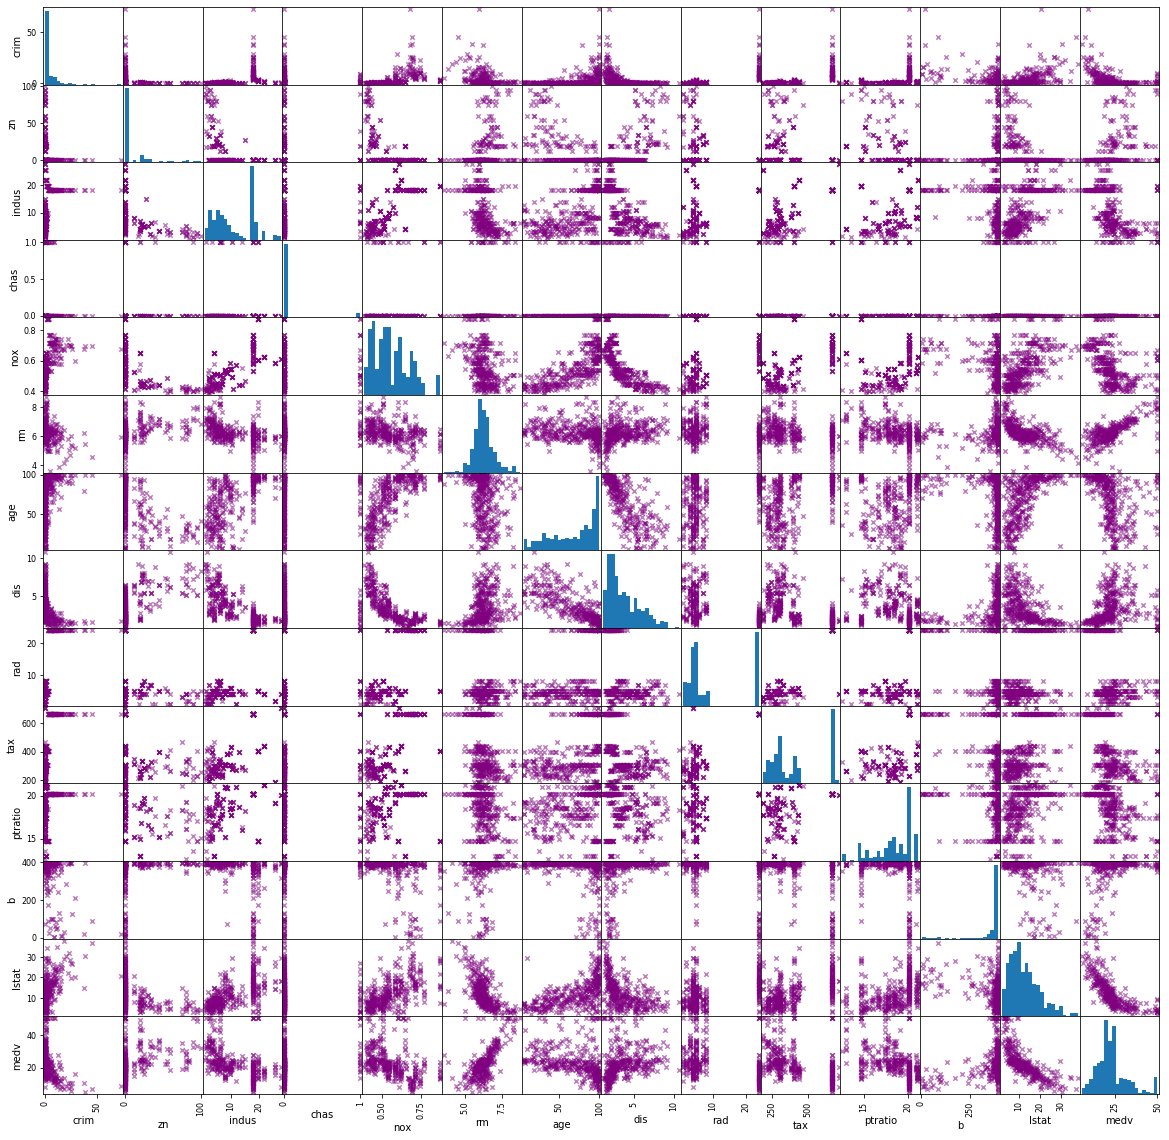

In [7]:
# let's drop the ID for global visualizations
df_simple = df.drop('ID',axis = 1)

pd.plotting.scatter_matrix( df_simple,diagonal='hist',
                             figsize=(20,20),
                             c='purple',
                             s=20,marker='x',
                            hist_kwds={'bins':20} )
plt.show()

In [8]:
# Let's look at a correlation matrix plot 
corr=df_simple.corr()
corr.shape

(14, 14)

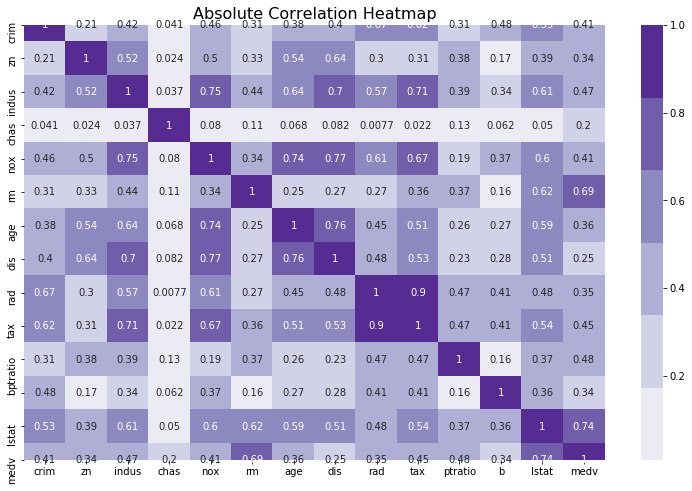

In [9]:
plt.figure(figsize=(13,8))
sns.heatmap(data=np.abs(corr),cmap = sns.color_palette('Purples'), annot=True)
plt.title('Absolute Correlation Heatmap',fontsize = 16)
plt.show()

              tax     ptratio        medv
count  333.000000  333.000000  333.000000
mean   409.279279   18.448048   22.768769
std    170.841988    2.151821    9.173468
min    188.000000   12.600000    5.000000
25%    279.000000   17.400000   17.400000
50%    330.000000   19.000000   21.600000
75%    666.000000   20.200000   25.000000
max    711.000000   21.200000   50.000000


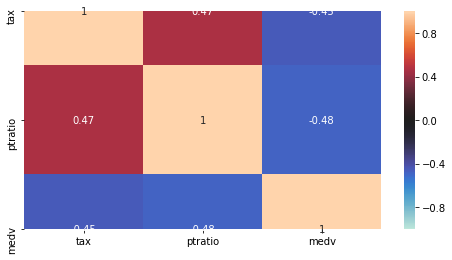

In [10]:
# These plots are a bit overwhelming due to the number of variables.
# Let's see if some correlations make sense.
# intuitively, the columns  tax, ptratio and medv should have high correlations: 
#     better school= higher taxes = higher property value
df_subset = df.loc[:,('tax', 'ptratio', 'medv')]
print(df_subset.describe())

# correlations between these 3 variables
df_subset.corr()

# visualization
plt.figure(figsize=(8,4))
sns.heatmap( data=df_subset.corr(),vmin=-1,vmax=1,cbar=1,center=0,annot=True)




Expected: positive correlation betwen tax and medv.

Observed: negative correlation ????

Expected: negative correlation between medv and ptratio.

Observed: positive correlation ????

Let's do scatter plot of medv and tax, then of medv and ptratio

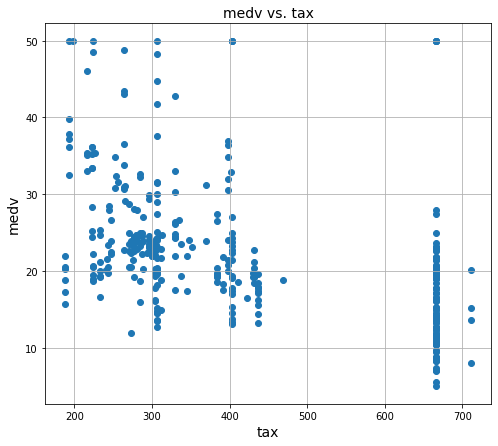

In [11]:
plt.figure(figsize =(8,7))
plt.grid(zorder=0)
plt.title('medv vs. tax',fontsize=14)
plt.ylabel('medv',fontsize=14)
plt.xlabel('tax',fontsize=14)
plt.scatter(df['tax'],df['medv'])

I did not expect that. It seems there are 2 diffferent regimes or domains.
1.  high tax value >650 and low medv in 0-30 range
2. low tax in 0-500 range and medium to high medv 10-50

That does not make sense to me.

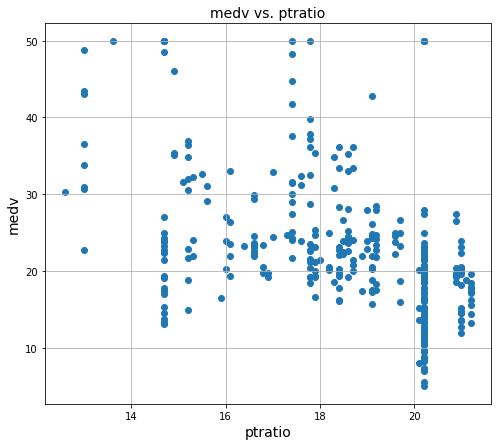

In [12]:
# Let's do scatter plot of medv and ptratio
plt.figure(figsize =(8,7))
plt.grid(zorder=0)
plt.title('medv vs. ptratio',fontsize=14)
plt.ylabel('medv',fontsize=14)
plt.xlabel('ptratio',fontsize=14)
plt.scatter(df['ptratio'],df['medv'])

This seems to make more sense.
The more students in the classrooms, the smaller the value of the houses.
But there seems to be a lot of dispersion in the data.


There is clearly 2 regimes of tax values. Let's look at them separately

(array([41., 60., 71., 17., 51.,  1.,  0.,  0.,  0., 92.]),
 array([188. , 240.3, 292.6, 344.9, 397.2, 449.5, 501.8, 554.1, 606.4,
        658.7, 711. ]),
 <a list of 10 Patch objects>)

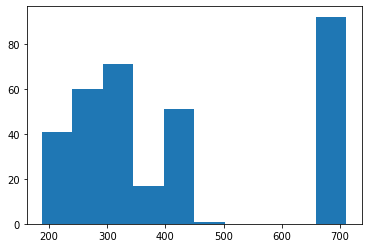

In [13]:
plt.hist(df['tax'])

In [14]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [15]:
# make a categotical variable  from tax range.
print(df['tax'].dtype)
tax_cat=[]
for value in df['tax']:
    if value <600:
        tax_cat.append(1)
    else:
        tax_cat.append(2)
df['tax_cat'] = tax_cat


int64


In [16]:
df['tax_cat'].unique()

array([1, 2], dtype=int64)

In [17]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax_cat
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,1
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,1


In [18]:
# Let's look at low tax bracket
dflowtax= df.loc[df['tax_cat']==1]
dflowtax.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax_cat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1


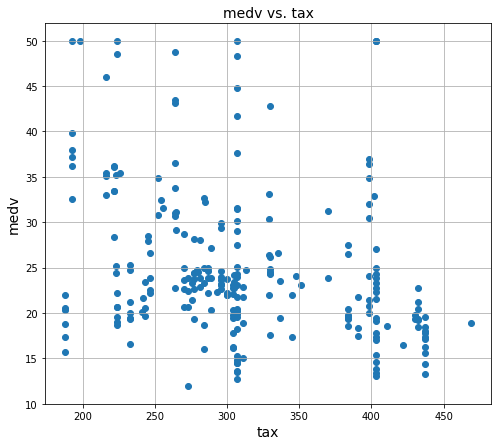

In [19]:
plt.figure(figsize =(8,7))
plt.grid(zorder=0)
plt.title('medv vs. tax',fontsize=14)
plt.ylabel('medv',fontsize=14)
plt.xlabel('tax',fontsize=14)
plt.scatter(dflowtax['tax'],dflowtax['medv'])

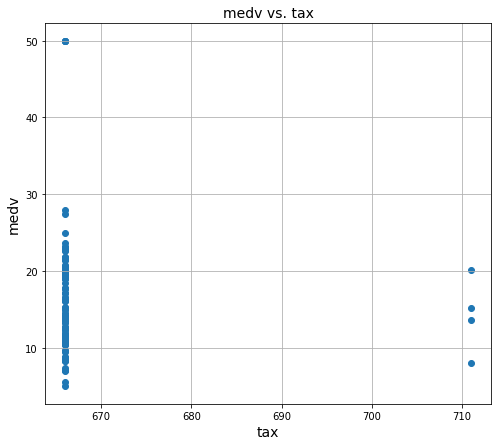

In [20]:
# Let's look at high tax bracket
dfhightax= df.loc[df['tax_cat']==2]
dfhightax.head()
plt.figure(figsize =(8,7))
plt.grid(zorder=0)
plt.title('medv vs. tax',fontsize=14)
plt.ylabel('medv',fontsize=14)
plt.xlabel('tax',fontsize=14)
plt.scatter(dfhightax['tax'],dfhightax['medv'])
plt.show()

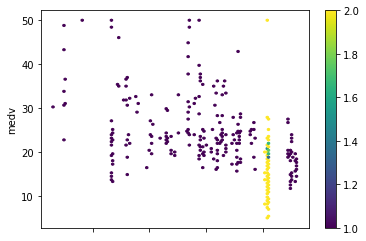

In [21]:
df.plot.hexbin('ptratio','medv',C='tax_cat',cmap='viridis') # scatter graph with 3 dimensions: x / y / color 

Why are they some green values? It should be 1 or 2.
Is it because some value are averaged through the hexbin option?

Neither of these 2 previous plots make sense to me ...??

BAsed on correlation display, medv is most correlated with lstat (lower status of th epopulation) and rm(average number of rroms per dwelling)

Let's see ...



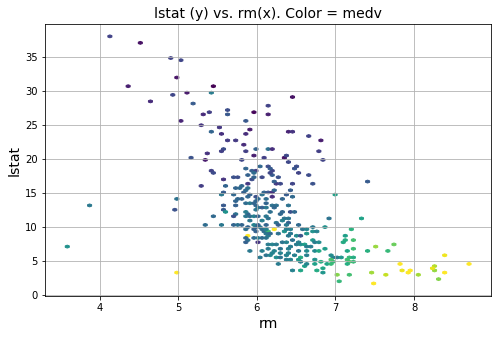

In [38]:
plt.figure(figsize =(8,5))
plt.grid(zorder=0)
plt.title('lstat (y) vs. rm(x). Color = medv',fontsize=14)
plt.ylabel('lstat',fontsize=14)
plt.xlabel('rm',fontsize=14)
plt.hexbin(df['rm'],df['lstat'],C=df['medv'],cmap='viridis')
plt.show()

In [23]:
Why 2 different figures??

Object `figures` not found.
